# Description:
This notebook provides the basic processing steps to generate a sky map of the simulated detector data using maximum-likelhood mapmaker from sotodlib library. Following are the steps involved:

- Create observation, detector, and metadata databases to bind all the information needed for map making
- Generate a geometry fits file for projection
- Run the ML mapmaker
- Check map visualization

## 1. Context Generator
This step can load either h5 or g3 simulation files to extract the observation and detector information and create the sotodlib compatible context and database files.

In [2]:
from context_generator import *

In [4]:
#Get the base directory containing simulation files
base_path = '/home/sourav/ccat_workspace/test_data5_PCAM/h5_test3_10dets/sim_PCAM280_h5_d1/'

#Instatiate the context generator object
h5cxt = H5ContextWriter(base_path)

#Create the context and databases
h5cxt.process_obs()

Loaded 36 observation files.
Processing file: /home/sourav/ccat_workspace/test_data5_PCAM/h5_test3_10dets/sim_PCAM280_h5_d1/obs_OrionA-0-0_2258383281.h5
++++++ Added observation: 1754989200_f280
Processing file: /home/sourav/ccat_workspace/test_data5_PCAM/h5_test3_10dets/sim_PCAM280_h5_d1/obs_OrionA-0-1_3438123467.h5
++++++ Added observation: 1754989690_f280
Processing file: /home/sourav/ccat_workspace/test_data5_PCAM/h5_test3_10dets/sim_PCAM280_h5_d1/obs_OrionA-1-0_415392339.h5
++++++ Added observation: 1754990260_f280
Processing file: /home/sourav/ccat_workspace/test_data5_PCAM/h5_test3_10dets/sim_PCAM280_h5_d1/obs_OrionA-1-1_1890805074.h5
++++++ Added observation: 1754990750_f280
Processing file: /home/sourav/ccat_workspace/test_data5_PCAM/h5_test3_10dets/sim_PCAM280_h5_d1/obs_OrionA-10-0_2478516145.h5
++++++ Added observation: 1755007000_f280
Processing file: /home/sourav/ccat_workspace/test_data5_PCAM/h5_test3_10dets/sim_PCAM280_h5_d1/obs_OrionA-10-1_3713310273.h5
++++++ Added obs

This will create a `context` directory in the current working location, containing all the necessary files.

## 2. Geometry FITS file
Running the following script will generate a `geom.fits` file in `context/` containing sky projections.

In [5]:
%run write_footprint_FYSTv1.py

Init context...
Load obs list...
OrderedDict([('obs_id', '1754989200_f280'), ('timestamp', 1754989200.0), ('duration', 479.99749994277954), ('start_time', 1754989200.0), ('stop_time', 1754989679.9975), ('type', 'obs'), ('subtype', 'survey'), ('telescope', 'FYST'), ('telescope_flavor', 'CMBPol'), ('tube_slot', 'f280'), ('tube_flavor', 'CMBPol'), ('detector_flavor', 'TES'), ('wafer_slot_mask', '_'), ('el_nom', 35.28), ('el_span', 0.0), ('az_nom', 82.16499999999971), ('az_span', 5.02514455505669), ('roll_nom', 0.0), ('roll_span', 0.0), ('wafer_slots', 'w12'), ('target', 'oriona'), ('toast_obs_name', 'OrionA-0-0'), ('toast_obs_uid', 2258383281)])
OrderedDict([('obs_id', '1754989690_f280'), ('timestamp', 1754989690.0), ('duration', 469.99749994277954), ('start_time', 1754989690.0), ('stop_time', 1754990159.9975), ('type', 'obs'), ('subtype', 'survey'), ('telescope', 'FYST'), ('telescope_flavor', 'CMBPol'), ('tube_slot', 'f280'), ('tube_flavor', 'CMBPol'), ('detector_flavor', 'TES'), ('wafer

## 3. ML Map Making
Finally, we will be using the script `make_ml_map.py` from sotodlib with minor modifications to run the ML estimator on simulated tods.

In [6]:
%run make_ml_map.py --config-file config.yaml

  0   18.14  0.29  2.85  3.25 Reading 36 tods
  0   18.14  0.29  2.93  3.25 Processing 1754989200_f280_w12_f280
  0   18.16  0.41  3.62  3.92 Processing 1754989690_f280_w12_f280
  0   18.19  0.41  3.63  3.92 Processing 1754990260_f280_w12_f280
  0   18.21  0.42  3.64  3.92 Processing 1754990750_f280_w12_f280
  0   18.24  0.43  3.65  3.92 Processing 1754991320_f280_w12_f280
  0   18.26  0.44  3.66  3.92 Processing 1754991810_f280_w12_f280
  0   18.29  0.44  3.66  3.92 Processing 1754992380_f280_w12_f280
  0   18.32  0.46  3.68  3.92 Processing 1754992900_f280_w12_f280
  0   18.34  0.46  3.68  3.92 Processing 1754993500_f280_w12_f280
  0   18.37  0.47  3.68  3.92 Processing 1754994020_f280_w12_f280
  0   18.39  0.48  3.69  3.92 Processing 1754994620_f280_w12_f280
  0   18.42  0.49  3.70  3.92 Processing 1754995170_f280_w12_f280
  0   18.45  0.50  3.71  3.92 Processing 1754995800_f280_w12_f280
  0   18.48  0.52  3.73  3.92 Processing 1754996380_f280_w12_f280
  0   18.50  0.52  3.73  3.92 

This will generate few fits files in the `output_MLmaps` directory. The optimizer for the ML estimator will save intermediate results in a regular interval (currently set at 50 steps). In addition, the final output will be saved as `ml_maps_sky_map.fits` in the directory.

## 4. Map Visulaization
We can quickly check the map output using astropy reader. There are also other map visualization tools that can be used at this point.

In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', dpi = 300)


In [8]:
#open the fits file
imgf = fits.open('output_MLmaps/ml_maps_sky_map.fits')

#check whats inside
imgf.info()

Filename: output_MLmaps/ml_maps_sky_map.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      21   (2400, 1622, 1)   float64   


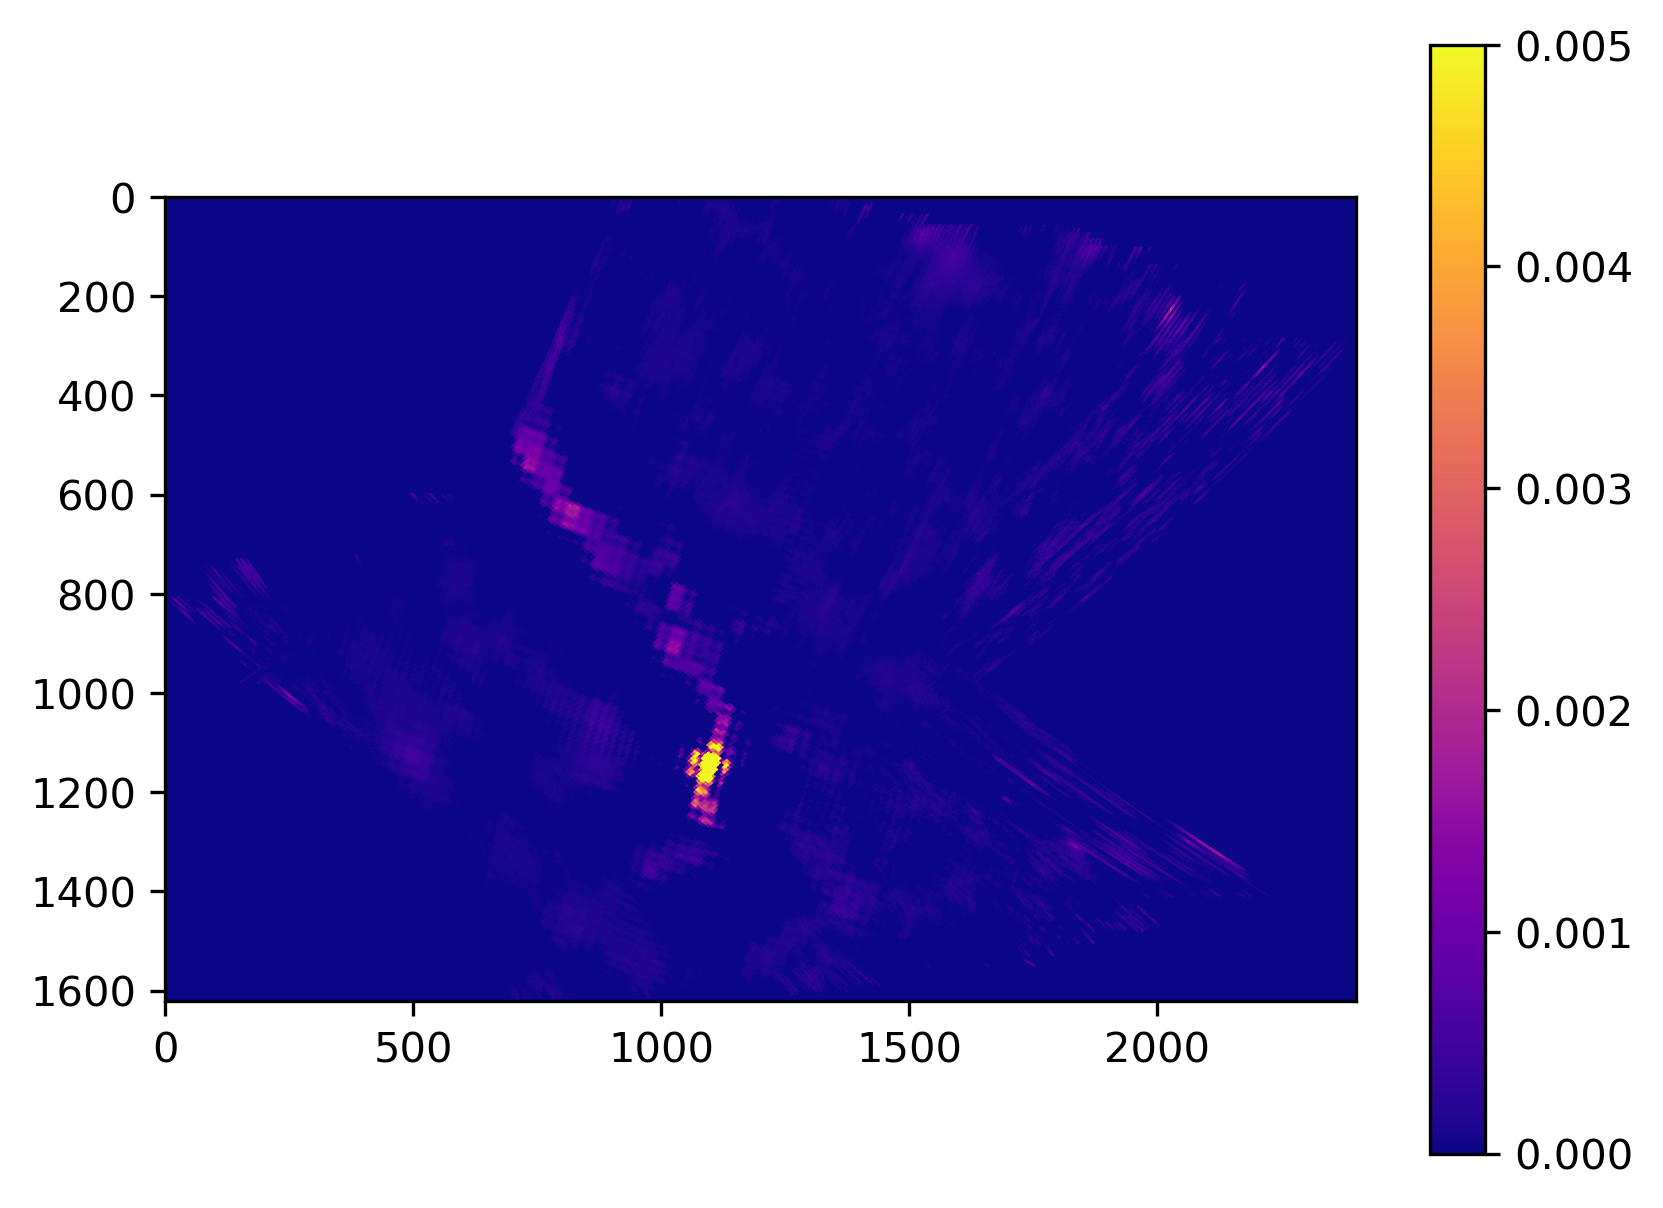

In [10]:
#load the data into np arrays
imgd = fits.getdata('output_MLmaps/ml_maps_sky_map.fits')
#plot
plt.imshow(imgd[0], cmap='plasma', vmin=0.0, vmax=0.005)
plt.colorbar()
plt.show()